In [2]:
import sys
import glob
import re
import fnmatch
import math
import os
from os import listdir
from os.path import join, isfile, basename

import itertools

import numpy as np
from numpy import float32, int32, uint8, dtype, genfromtxt

import scipy.stats
from scipy.stats import ttest_ind

import pandas as pd

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

import colorsys

In [3]:
# Load combined data
# dist_samples_f = '/nrs/saalfeld/john/projects/flyChemStainAtlas/all_evals/label_data.csv.gz'
dist_samples_f = '/nrs/saalfeld/john/projects/flyChemStainAtlas/all_evals/label_data_line0.csv.gz'

dist_samples_df = pd.read_csv( dist_samples_f, header=None, names=['TEMPLATE','ALG','LINE','LABEL','DISTANCE'] )
print( dist_samples_df.shape )

(750887510, 5)


In [6]:
labels = [16,64,8,32,2,4,65,66,33,67,34,17,69,70,35,71,9,18,72,36,73,74,37,75,19,76,38,77,39,78,79,20,5,40,80,10,81,82,83,84,85,86,11,22,23,24,12,3,6,49,50,25,51,13,52,26,53,27,54,55,56,28,7,14,57,58,29,59,30,60,15,61,31,62,63]
lines = [0,1,2,3]
alg1 = 'cmtkCow'
alg2 = 'antsRegYang'
template = 'F-antsFlip_lo'
fixed_alg = 'cmtkCOG'

# alg1 = 'cmtkCOG'
# alg2 = 'antsRegYang'

df_alg1 = dist_samples_df[ (dist_samples_df.ALG == alg1) & (dist_samples_df.TEMPLATE == template) ]
df_alg2 = dist_samples_df[ (dist_samples_df.ALG == alg2) & (dist_samples_df.TEMPLATE == template) ]

In [7]:
dist_samples_df['TEMPLATE'].unique()

array(['F-antsFlip_lo', 'JFRC2013_lo', 'F-cmtkFlip_lof', 'TeforBrain_f',
       'JFRCtemplate2010'], dtype=object)

In [58]:
# Effect size across different templates
# t1 = 'F-antsFlip_lo'
# t2 = 'JFRCtemplate2010'
# alg1 = 'cmtkCOG'

# df_t1 = dist_samples_df[ (dist_samples_df.ALG == alg1) & (dist_samples_df.TEMPLATE == t1) ]
# df_t2 = dist_samples_df[ (dist_samples_df.ALG == alg1) & (dist_samples_df.TEMPLATE == t2) ]


In [4]:
# violin plot, compare templates 

# df_cat = pd.concat([df_t1_l, df_t2_l])
# sns.violinplot( y=df_cat.DISTANCE, x=df_cat.TEMPLATE )


In [5]:
# ax = sns.distplot( df_t1_l['DISTANCE'], hist=False )
# sns.distplot( df_t2_l['DISTANCE'], hist=False, ax=ax )

loading
done
(65737626, 5)
filtering by algorithm and label 
F-antsFlip_lo
JFRC2013_lo
F-cmtkFlip_lof
TeforBrain_f
JFRCtemplate2010
filtering by algorithm and label 
F-antsFlip_lo
JFRC2013_lo
F-cmtkFlip_lof
TeforBrain_f
JFRCtemplate2010
filtering by algorithm and label 
F-antsFlip_lo
JFRC2013_lo
F-cmtkFlip_lof
TeforBrain_f
JFRCtemplate2010
filtering by algorithm and label 
F-antsFlip_lo
JFRC2013_lo
F-cmtkFlip_lof
TeforBrain_f
JFRCtemplate2010
filtering by algorithm and label 
F-antsFlip_lo
JFRC2013_lo
F-cmtkFlip_lof
TeforBrain_f
JFRCtemplate2010
filtering by algorithm and label 
F-antsFlip_lo
JFRC2013_lo
F-cmtkFlip_lof
TeforBrain_f
JFRCtemplate2010
filtering by algorithm and label 
F-antsFlip_lo
JFRC2013_lo
F-cmtkFlip_lof
TeforBrain_f
JFRCtemplate2010
filtering by algorithm and label 
F-antsFlip_lo
JFRC2013_lo
F-cmtkFlip_lof
TeforBrain_f
JFRCtemplate2010
filtering by algorithm and label 
F-antsFlip_lo
JFRC2013_lo
F-cmtkFlip_lof
TeforBrain_f
JFRCtemplate2010
filtering by algorithm and l

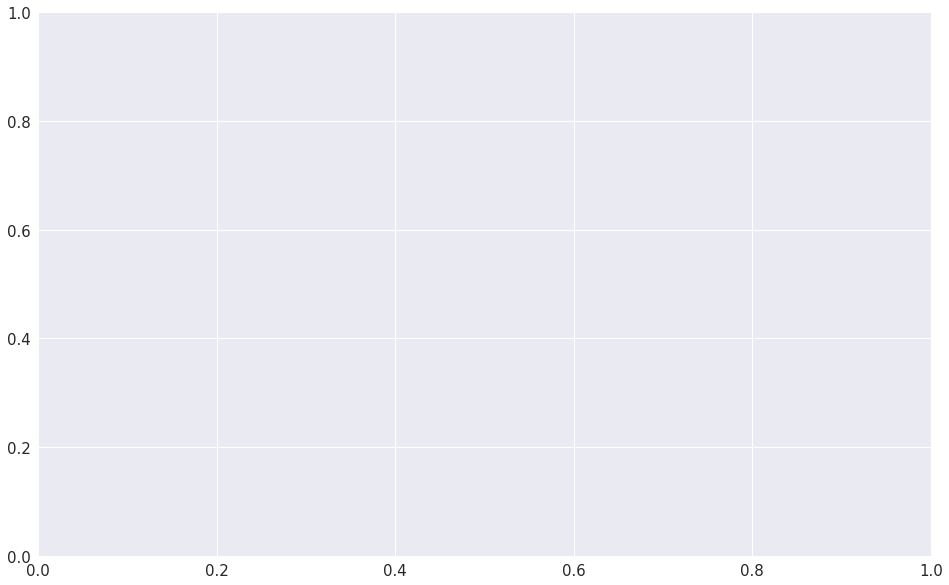

In [91]:
# Plot everything for this label

line = 2
alg = 'cmtkCOG'
label = 71
sns.set(font_scale=1.5)

print('loading')
dist_samples_f = '/nrs/saalfeld/john/projects/flyChemStainAtlas/all_evals/label_data_line{}.csv.gz'.format(line)
dist_samples_df = pd.read_csv( dist_samples_f, header=None, names=['TEMPLATE','ALG','LINE','LABEL','DISTANCE'] )
print('done')
print( dist_samples_df.shape )


dest_dir='/nrs/saalfeld/john/projects/flyChemStainAtlas/all_evals/hist_figs/'
template_list = ['F-antsFlip_lo', 'JFRC2013_lo', 'F-cmtkFlip_lof', 'TeforBrain_f','JFRCtemplate2010']

df_a = dist_samples_df[(dist_samples_df.ALG == alg)]

for label in labels:
    print( 'filtering by algorithm and label ')
    df_la = df_a[ (df_a.LABEL == label) ]

    ax = None
    for template in template_list:
        print( template )
        df_t = df_la[ (df_la.TEMPLATE == template ) ]
        if not ax:
            ax = sns.distplot( df_t['DISTANCE'], hist=False, label=template )
        else:
            sns.distplot( df_t['DISTANCE'], hist=False, label=template )

    
    ax.legend()
    ax.set_title('alg: {}, label: {}, N={}'.format(alg,label,len(df_t)))
    ax.set_xlim(0, 25)

    fig = plt.gcf()
    a = fig.set_size_inches( 16, 10 )
    plt.savefig( '{}/line{}_{}_{}_hist.png'.format( dest_dir, line, alg, label ))
    ax.clear()


In [ ]:
# group labels 
line = 0
alg = 'cmtkCOG'
sns.set(font_scale=1.5)

print('loading')
dist_samples_f = '/nrs/saalfeld/john/projects/flyChemStainAtlas/all_evals/label_data_line{}.csv.gz'.format(line)
dist_samples_df = pd.read_csv( dist_samples_f, header=None, names=['TEMPLATE','ALG','LINE','LABEL','DISTANCE'] )
print('done')
print( dist_samples_df.shape )


dest_dir='/nrs/saalfeld/john/projects/flyChemStainAtlas/all_evals/hist_figs/'
template_list = ['F-antsFlip_lo', 'JFRC2013_lo', 'F-cmtkFlip_lof', 'TeforBrain_f','JFRCtemplate2010']

df_a = dist_samples_df[(dist_samples_df.ALG == alg)]

print( 'filtering by algorithm and label ')
df_la = df_a

ax = None
for template in template_list:
    print( template )
    df_t = df_la[ (df_la.TEMPLATE == template ) ]
    if not ax:
        ax = sns.distplot( df_t['DISTANCE'], hist=False, label=template )
    else:
        sns.distplot( df_t['DISTANCE'], hist=False, label=template )


ax.legend()
ax.set_title('alg: {}, all labels, N={}'.format(alg,len(df_t)))
ax.set_xlim(0, 25)

fig = plt.gcf()
a = fig.set_size_inches( 16, 10 )
plt.savefig( '{}/line{}_{}_alllabels_hist.png'.format( dest_dir, line, alg ))
ax.clear()


In [17]:
# for all lines / labels
out_line_list = []
out_label_list = []
out_count1_list = []
out_count2_list = []
out_mean1_list = []
out_mean2_list = []
out_tstat_list = []
out_pval_list = []

N = -1

# for line,label in itertools.product( lines, labels ):
for line,label in itertools.product( [1], [16,64]):
    print( 'line: {},  label {}'.format( line, label ))

    df_alg1_line_label = df_alg1[ (df_alg1.LINE == line) & (df_alg1.LABEL == label) ]
    df_alg2_line_label = df_alg2[ (df_alg2.LINE == line) & (df_alg2.LABEL == label) ]
    
    print( df_alg1_line_label.shape )
    print( df_alg2_line_label.shape )
    
    s1 = df_alg1_line_label
    s2 = df_alg2_line_label
    
    if( N < 0 or df_alg1_line_label.shape[0] <= N ):
        s1 = df_alg1_line_label
    else:
        s1 = df_alg1_line_label.sample(20000)
        
    if( N < 0 or df_alg2_line_label.shape[0] <= N ):
        s2 = df_alg2_line_label
    else:
        s2 = df_alg2_line_label.sample(20000)
    
    mn1 = s1['DISTANCE'].mean()
    mn2 = s2['DISTANCE'].mean()
    
    t,p = ttest_ind( s1['DISTANCE'], s2['DISTANCE'])
    
    out_line_list += [line]
    out_label_list += [label]
    out_count1_list += [df_alg1_line_label.shape[0]]
    out_count2_list += [df_alg2_line_label.shape[0]]
    out_mean1_list += [ mn1 ]
    out_mean2_list += [ mn2 ]
    out_tstat_list += [t]
    out_pval_list += [p]

line: 1,  label 16
(8276, 5)
(10882, 5)
line: 1,  label 64
(45858, 5)
(44636, 5)


In [13]:

# df = pd.DataFrame( {'LINE':out_line_list,
#                     'LABEL':out_label_list,
#                     ('COUNT_'+alg2):out_count1_list,
#                     ('COUNT_'+alg2):out_count2_list,
#                     ('MEAN_'+alg1):out_mean1_list,
#                     ('MEAN_'+alg2):out_mean2_list,
#                     'TSTAT':out_tstat_list,
#                     'PVAL':out_pval_list })
